# <center> Wendy Mira  
# <center> Physics 4200
# <center> Final Project 

## Problem
An NMR experiment was conducted to gather the knight shift of an organic material, HKUST-TCNQ. A single gaussian fitted curve is used in this example to demonstrate how fitted data is used within material science research. A double gaussian curve fit corresponds to a reference substance and the studied sample -- HKUST-TCNQ in our case -- is expected to be observed. If the organic compound sample is paramagnetic then as the applied temperature is changed a shift in the samples' gaussian maximum amplitude and its corresponding frequency should be observed (see Figure 1). 

## Introduction

   In this project I produce a single Guassian fitted curve for a dataset obtained from a nuclear magnetic resonance (NMR) experiment. The goal of fitting a curve onto NMR data is to produce a plot that compares the frequency shift of a sample that undergoes temperature changes under a magnetic field.  
   If a frequency shift is observed between the reference compound and the sample being analysed, then orbital and spin contributions to the magnetic susceptibility cannot be considered separately. For instance, in heavy fermions containing 4f or 5f electrons, the Knight shift is strongly temperature dependent.

<center> Figure 1. 
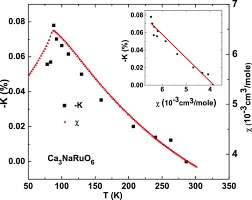

## Guassian Fit

### Modules

In [225]:
import matplotlib.pyplot as plt
import pylab as plb

import scipy
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

import numpy as np
import pandas as pd

### Import Data

In [226]:
# Control delimiters, rows, column names with read_csv (see later) 
absorption = pd.read_csv("HKUST-1-TCNQ-plus-CuBr-in-epoxy-10192018-1ABSORP.csv")
frequency_o = pd.read_csv("HKUST-1-TCNQ-plus-CuBr-in-epoxy-10192018-1FREQS.csv")
dispersion = pd.read_csv("HKUST-1-TCNQ-plus-CuBr-in-epoxy-10192018-1DISPERS.csv")

### Variables

In [227]:
#Setting variables to datasets
A = absorption   # Material absorption from NMR data
D = dispersion   # Material dispersion from NMR data

x = frequency_o    #Applied frequency from NMR experiment
y = magnitude(A,D)

X_data = x
Y_data = y

### Function
A function is created below that changes our imported data to be all positive. Secondly the guassian equation is represented as a function below.

In [228]:
#function finds the magnitude of the absorption and dispersion data to make positive
def magnitude(x,y):
    mag = np.sqrt(x.values**2 + y.values**2)   #magnitude produces all positive values
    return mag

In [1]:
#function of Gaussian curve 
def gaus(x,a,x0,b):   #x - point from guassian fit , a - amplitude, x0 - applied frequency, b - bell curve
    return a*exp(-(x-x0)**2/(2*b**2))

### Setting parameters for best fit Gaussian curve

The scipy package was imported to develope a curve fit. Scipy optimize was used to setup parameters that could provide an improved fitted line. In the fake data, for the guassian curve, 'pcov' and 'popt' were used to compute parameters in the standard deviation errors and to provide optimal values for the parameters to minimize the residuals of the gaussian function and the x and y data arrays.

In [207]:
popt, pcov = curve_fit(gaus, X_data, Y_data)

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

### Error
The following error could not be resolved:
<b>ValueError: object too deep for desired array</b>

### Fitting curve to data

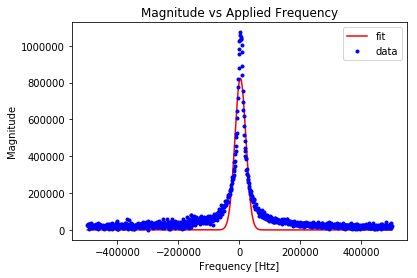

In [224]:
plt.plot(X_data, gaus(X_data, *popt), 'r-', label='fit')   #best fitted curve
plt.plot(X_1,Y_1, 'b.', label='data')                      #imported data
plt.legend()
plt.title('Magnitude vs Applied Frequency')
plt.xlabel('Frequency [Htz]')
plt.ylabel('Magnitude')

plt.savefig('Magnitude-vs-Applied-Frequency.png')


## Conclusion

A single Gaussian fitted curve was produced for a single NMR data set. The peak of the curve was reduced in from using the Gaussian function. This means that a different equation should be used to analyze this NMR dataset. A Lorenztian or Pseudo-Voignt function could be used instead of a Gaussian fitted curve to reduce the %error bars of the expected Knight shift plot. 

### References

1. https://github.com/Ffisegydd/python-examples/blob/master/examples/scipy/fitting%20a%20gaussian%20with%20scipy%20curve_fit.py
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
3. https://www.researchgate.net/publication/302591735_Comparative_NMR_studies_on_Ca3LiRuO6_and_Ca3NaRuO6/citations

# Problem
# Continuation of Midterm

In studies by John Ellisa, Natsumi Nagatab and Keith A. Olivec, the theoretical representation for the calculation of spin-independent scattering matrix elements for the scattering of WIMP dark matter particles on nuclear matter. In the midterm project I found data for a dark matter detector, Xenon100. After further research I fould a theoretical equation for the relationship between WIMP mass and the cross-section of nuclear recoil. 

## Introduction
The XENON100 experiment is designed to search for interactions of Weakly Interacting Massive Particles in a liquid Xenon time projection chamber. The Xenon100 detector features a large target mass and an extremely low background interaction for preferred sensitivity. XENON100 is one of the most sensitive dark matter direct detection experiment.

## Modules

In [105]:
import numpy as np
import matplotlib.colors
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv

## Access .CSV Data
Data is imported from CSV file onto the python notebook. The data is printed in its original format including units.

In [106]:
with open('WIMP-DATA.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        print(row[0], row[1])

WIMP mass [GeV/$c^2$] WIMP-nucleon cross section [cm$^2$]
3 6.53E-39
3.404462103 7.25E-40
3.863454069 1.76E-40
4.384327655 6.35E-41
4.975425782 2.96E-41
5.646216173 1.65E-41
6.407442995 1.04E-41
7.271298951 7.23E-42
8.251620571 5.51E-42
9.36410984 4.52E-42
10.62658569 3.88E-42
12.05926942 3.39E-42
13.68510858 2.96E-42
15.53014451 2.62E-42
17.62392948 2.40E-42
20 2.24E-42


In [107]:
f = open("WIMP-DATA.csv")
csv_f = csv.reader(f)
for row in csv_f:
    print('{:<15}''{:<20}'.format(*row, row[1]))

WIMP mass [GeV/$c^2$]WIMP-nucleon cross section [cm$^2$]
3              6.53E-39            
3.404462103    7.25E-40            
3.863454069    1.76E-40            
4.384327655    6.35E-41            
4.975425782    2.96E-41            
5.646216173    1.65E-41            
6.407442995    1.04E-41            
7.271298951    7.23E-42            
8.251620571    5.51E-42            
9.36410984     4.52E-42            
10.62658569    3.88E-42            
12.05926942    3.39E-42            
13.68510858    2.96E-42            
15.53014451    2.62E-42            
17.62392948    2.40E-42            
20             2.24E-42            


In [108]:
#separate data into unique variables
mass_x, cross_section_y = np.loadtxt('WIMP-DATA.csv', delimiter=',',usecols=[0,1],skiprows=1, unpack='true')
print('x values:', mass_x, '\n','\n', 'y-values:', cross_section_y)

x values: [  3.           3.4044621    3.86345407   4.38432765   4.97542578
   5.64621617   6.407443     7.27129895   8.25162057   9.36410984
  10.62658569  12.05926942  13.68510858  15.53014451  17.62392948  20.        ] 
 
 y-values: [  6.53000000e-39   7.25000000e-40   1.76000000e-40   6.35000000e-41
   2.96000000e-41   1.65000000e-41   1.04000000e-41   7.23000000e-42
   5.51000000e-42   4.52000000e-42   3.88000000e-42   3.39000000e-42
   2.96000000e-42   2.62000000e-42   2.40000000e-42   2.24000000e-42]


    The data directily above was printed without the first row which describes what each column in the original data represents. The data above is a reproduction of a "A Profile Likelihood analysis" gathered by the nucleon recoil detector XENON100. The detector is to observed the WIMP exclusion spin-scattering limit. [1]

In [ ]:
f = open("WIMP-DATA.csv")
csv_f = csv.reader(f)
for row in csv_f:
    print('{:<15}''{:<20}'.format(*row, row[1]))

#separate data into unique variables
mass_x, cross_section_y = np.loadtxt('WIMP-DATA.csv', delimiter=',',usecols=[0,1],skiprows=1, unpack='true')
print('x values:', mass_x, '\n','\n', 'y-values:', cross_section_y)

The data directily above was printed without the first row which describes what each column in the original data represents. The data above is a reproduction of a "A Profile Likelihood analysis" gathered by the nucleon recoil detector XENON100. The detector is to observed the WIMP exclusion spin-scattering limit. [1]

## Equation
At zero momentum transfer, and neglecting nuclear structure effects, the spin-independent cross-section for the elastic scattering of a generic WIMP on a nucleus with charge Z and atomic number A, mass $m_r$ , and isospin transformation $f_n$.

$\sigma_S^Z = $($4m_r^2$)/$\pi$ $[Z$ $f_p$ + (A-Z)$f_n$]^2

## Plot
Particles that make up Dark Matter are assumed to have mass in the GeV–TeV range and interaction with ordinary matter through weak forces. A nuclear recoil with energy in the KeV range is the only signature of the interaction of WIMPs and neutrinos scattering elastically off atomic nuclei. Although the WIMP mass and atomic number are unknown, most recoils have energies below ~100 KeV.

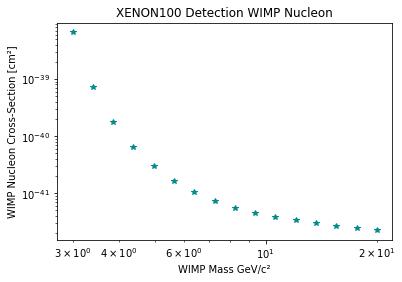

In [109]:
#plot

#format axis to proper scale
plt.loglog(mass_x, cross_section_y, '*', color='#008B8B', linewidth=3.0)

#appropriate labels and units
plt.title('XENON100 Detection WIMP Nucleon')
plt.xlabel('WIMP Mass GeV/c\u00b2')
plt.ylabel('WIMP Nucleon Cross-Section [cm\u00b2]')

#download plot as figure
plt.savefig('Xenon100_Detection_WIMP_NUCLEON.png', dpi = 300)
#dpi = 100

The plot above comes from data collected by the XENON 100 detector and observes the WIMP exclusion limit on the spin-independent WIMP-nucleon scattering cross section at 90% confidence level. 

The x-axis shows the mass of a scattered recoil nucleon. The y-axis shows the cross sectional size of the nucleon. Notice that as the mass of a nucleon increases the less sensitive the detector becomes, hence the smaller the cross section of detection. 

## Conclusion
Xenon100 analyses show that the recoil energy is determined using the size of the S1 signal and the relative scintillation efficiency for the nuclear recoils compared with a 122keV calibration gamma line of 57Co. In previous XENON100 analyses WIMPs masses below 10GeV/$c^2$ create nuclear recoils up to a few keV. Nuclear recoils of this magnitude produce results in a lower S2 signal resulting in an S2 signal and an S1 signal that becomes undetectable. This puts huge importance in the sensitivity of WIMP detection.  Although, without a comparable successful Dark Matter detection experiment, every event is analyzed as a probable Dark Matter interaction. Unlike the Xenon10, the Xenon100 has a minimum of 1000 events that undergo analysis.

### References

1. https://arxiv.org/abs/1605.06262
2. https://arxiv.org/pdf/1311.1088.pdf
3. https://www.sciencedirect.com/science/article/pii/S0370269318304635
4. https://journals.aps.org/prd/abstract/10.1103/PhysRevD.31.3059
5. http://xenon.astro.columbia.edu/XENON100_Experiment/
6.  https://arxiv.org/pdf/1805.09795.pdf